In [ ]:
import pandas as pd
import numpy as np
from os import listdir
import cv2 # this package should be installed: was also required in the previous week's materials (look in that notebook for the install command)
                    # assuming this is installed by now, otherwise inside a cell type: !pip install opencv-python
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
dir_struct = '/content/drive/MyDrive/faces/'


In [1]:
print("something")

something


In [ ]:
!pip install opencv-python

In [ ]:
class_names = ['Brown', 'Black', 'Grey','Blond','Red','White','Mixed','Other','Not Visible']

df  = pd.read_csv("/content/drive/MyDrive/annotations.csv")
'''
print('Number of images: ', df.shape[0])
print('The proportion of glass labels: ')
# you may see equal proportion: logical since we have randomly assigned the label
df.groupby(['Glasses']).count()
'''
print(df)


                  image_name  wrinkles  freakles  glasses  hair_color  hair_top
0        emotionet_3_136.jpg       0.0       0.0      0.0         0.0       2.0
1        emotionet_3_144.jpg       0.0       0.0      0.0         6.0       2.0
2        emotionet_3_221.jpg       0.0       0.0      0.0         1.0       2.0
3        emotionet_3_282.jpg       0.0       0.0      0.0         2.0       1.0
4        emotionet_3_370.jpg       0.0       0.0      0.0         3.0       1.0
...                      ...       ...       ...      ...         ...       ...
1886  emotionet_3_263230.jpg       1.0       0.0      1.0         3.0       3.0
1887  emotionet_3_263314.jpg       0.0       0.0      0.0         1.0       3.0
1888  emotionet_3_263361.jpg       0.0       0.0      0.0         3.0       2.0
1889  emotionet_3_263366.jpg       0.0       0.0      0.0         1.0       2.0
1890  emotionet_3_263417.jpg       1.0       0.0      0.0         1.0       1.0

[1891 rows x 6 columns]


**Resizing and Data prepertion**

In [ ]:
import os.path
haircolor_data=df
#glasses_labels.assign(new_col = dataset_images)
image_lst = [] # this list will hold all the images
#for i in range(glasses_labels.shape[0]): # read the image one by on
image_lst=haircolor_data['image_name']
haircolor_data=haircolor_data.drop(columns=["wrinkles","freakles", "glasses","hair_top"])
print(haircolor_data)

count=0
image_lst2=[]
for i in range(len(image_lst)):
  path=haircolor_data.iloc[i]['image_name']
  path=dir_struct+path
  print(path)
  count=count+1
  if os.path.isfile(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (50,75), interpolation = cv2.INTER_AREA) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm                                                                                         # this actually ensures all the features [pixel values] will be of same size
    image_lst2.append(image) # appending the read image to a list
  else :
    image_lst2.append("Empty")


print(count)



                  image_name  hair_color
0        emotionet_3_136.jpg         0.0
1        emotionet_3_144.jpg         6.0
2        emotionet_3_221.jpg         1.0
3        emotionet_3_282.jpg         2.0
4        emotionet_3_370.jpg         3.0
...                      ...         ...
1886  emotionet_3_263230.jpg         3.0
1887  emotionet_3_263314.jpg         1.0
1888  emotionet_3_263361.jpg         3.0
1889  emotionet_3_263366.jpg         1.0
1890  emotionet_3_263417.jpg         1.0

[1891 rows x 2 columns]
/content/drive/MyDrive/faces/emotionet_3_136.jpg
/content/drive/MyDrive/faces/emotionet_3_144.jpg
/content/drive/MyDrive/faces/emotionet_3_221.jpg
/content/drive/MyDrive/faces/emotionet_3_282.jpg
/content/drive/MyDrive/faces/emotionet_3_370.jpg
/content/drive/MyDrive/faces/emotionet_3_401.jpg
/content/drive/MyDrive/faces/emotionet_3_473.jpg
/content/drive/MyDrive/faces/emotionet_3_474.jpg
/content/drive/MyDrive/faces/emotionet_3_525.jpg
/content/drive/MyDrive/faces/emotionet_3_5

In [ ]:
haircolor_data['image'] = image_lst2

In [ ]:
haircolor_data

,image_name,hair_color,image
0,emotionet_3_136.jpg,0.0,"[[[165, 126, 126], [152, 118, 120], [161, 130,..."
1,emotionet_3_144.jpg,6.0,"[[[59, 62, 56], [58, 58, 55], [64, 65, 68], [6..."
2,emotionet_3_221.jpg,1.0,"[[[74, 59, 61], [63, 50, 54], [55, 44, 47], [4..."
3,emotionet_3_282.jpg,2.0,"[[[94, 66, 59], [21, 14, 14], [27, 16, 17], [2..."
4,emotionet_3_370.jpg,3.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...
1886,emotionet_3_263230.jpg,3.0,"[[[46, 74, 121], [46, 73, 119], [41, 67, 110],..."
1887,emotionet_3_263314.jpg,1.0,"[[[32, 46, 32], [30, 35, 25], [19, 21, 14], [1..."
1888,emotionet_3_263361.jpg,3.0,"[[[74, 73, 69], [74, 73, 69], [74, 73, 69], [7..."
1889,emotionet_3_263366.jpg,1.0,"[[[227, 226, 232], [227, 226, 232], [226, 225,..."


**Cleaning Data**

**Row 527 has a corrupted image I want to drop before starting, it has Empty value from the previous code**

In [ ]:
#print(glasses_data[glasses_data['image'] =="Empty"])
#print(glasses_data)
#Delete the image that does not exist
#df = df.drop(df[df.score < 50].index)
#print (glasses_data.loc[haircolor_data.image=="empty"])
haircolor_data= haircolor_data.drop([527])
#print(glasses_data[glasses_data['image'] =="Empty"])
# 

**Remove empty**

In [ ]:
haircolor_data=haircolor_data.dropna()
print(haircolor_data.isna().sum().sum())

0


In [ ]:
haircolor_data

,image_name,hair_color,image
0,emotionet_3_136.jpg,0.0,"[[[165, 126, 126], [152, 118, 120], [161, 130,..."
1,emotionet_3_144.jpg,6.0,"[[[59, 62, 56], [58, 58, 55], [64, 65, 68], [6..."
2,emotionet_3_221.jpg,1.0,"[[[74, 59, 61], [63, 50, 54], [55, 44, 47], [4..."
3,emotionet_3_282.jpg,2.0,"[[[94, 66, 59], [21, 14, 14], [27, 16, 17], [2..."
4,emotionet_3_370.jpg,3.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...
1886,emotionet_3_263230.jpg,3.0,"[[[46, 74, 121], [46, 73, 119], [41, 67, 110],..."
1887,emotionet_3_263314.jpg,1.0,"[[[32, 46, 32], [30, 35, 25], [19, 21, 14], [1..."
1888,emotionet_3_263361.jpg,3.0,"[[[74, 73, 69], [74, 73, 69], [74, 73, 69], [7..."
1889,emotionet_3_263366.jpg,1.0,"[[[227, 226, 232], [227, 226, 232], [226, 225,..."


**Convert to numpy array**

In [ ]:
#train_array=np.zeros((1509,150,100, 3))
#test_array=np.zeros((387,150,100, 3))

all_images=np.zeros((1887,
                     75,50,3))
#print(glasses_data.iloc[1]['image'].shape)


for i in range(len(haircolor_data)):
  all_images[i]=haircolor_data.iloc[i]['image']





In [ ]:
print(all_images.shape)

(1887, 75, 50, 3)


**Splitting Images**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
labels=haircolor_data.drop(columns=["image","image_name"])


In [ ]:
labels=labels.to_numpy()

In [ ]:
train, test,train_labels, test_labels = train_test_split(all_images,labels, test_size=0.20, random_state=42, stratify=labels)

In [ ]:
print(f'Shape of the training data: {train.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (1509, 75, 50, 3)
Shape of the training target: (1509, 1)
Shape of the test data: (378, 75, 50, 3)
Shape of the test target: (378, 1)


255.0

**Normalization**

In [ ]:
train_images, test_images = train / 255.0, test / 255.0

**Creating VGGA 16**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(75,50,3)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))  ## END BLOCK 1
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))   ## END BLOCK 2
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 3 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 4 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 5 
model.add(layers.Flatten())    ## converting to vector 
model.add(layers.Dense(4096, activation="relu"))    ## 1st FC layer 
model.add(layers.Dense(4096, activation="relu"))    ## 2st FC layer 
model.add(layers.Dense(10, activation="softmax"))    ## output layer 




model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 50, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 50, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 25, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 12, 256)       2

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
out_classes = 9
# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(75,50, 3))
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(out_classes, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 25, 128)       147584    
______________________________________________________________

**Train the Model**

Epoch 1/10
6/6 [==============================] - 53s 2s/step - loss: 2.1035 - accuracy: 0.3001 - val_loss: 1.7985 - val_accuracy: 0.4153
Epoch 2/10
6/6 [==============================] - 2s 332ms/step - loss: 1.7640 - accuracy: 0.4208 - val_loss: 1.7486 - val_accuracy: 0.4153
Epoch 3/10
6/6 [==============================] - 2s 333ms/step - loss: 1.7661 - accuracy: 0.4106 - val_loss: 1.7517 - val_accuracy: 0.4101
Epoch 4/10
6/6 [==============================] - 2s 334ms/step - loss: 1.7128 - accuracy: 0.4230 - val_loss: 1.6487 - val_accuracy: 0.4365
Epoch 5/10
6/6 [==============================] - 2s 334ms/step - loss: 1.6905 - accuracy: 0.4398 - val_loss: 1.5969 - val_accuracy: 0.4735
Epoch 6/10
6/6 [==============================] - 2s 337ms/step - loss: 1.5585 - accuracy: 0.4795 - val_loss: 1.6126 - val_accuracy: 0.4735
Epoch 7/10
6/6 [==============================] - 2s 336ms/step - loss: 1.5564 - accuracy: 0.4690 - val_loss: 1.4980 - val_accuracy: 0.4868
Epoch 8/10
6/6 [======

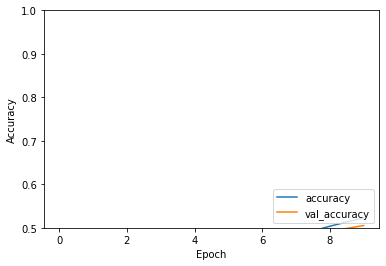

In [ ]:
# Training

#train_labels = np.asarray(train_labels).astype('float32')

#test_labels = np.asarray(test_labels).astype('float32')

history = model.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)
predictions = model.predict(test_images)

12/12 - 0s - loss: 1.5438 - accuracy: 0.5053
0.5052909851074219


In [ ]:
predictions[0]
# 9.1762088e-02
# (9.17) * (10 ** -2)
# np.argmax(predictions[0])

array([9.1762088e-02, 3.0903623e-01, 2.3883699e-01, 3.6310695e-02,
       7.4786483e-03, 7.1437404e-02, 3.3520836e-02, 2.2608256e-03,
       2.0916781e-01, 1.8843960e-04], dtype=float32)

**Save the model**

Epoch 1/10
5/5 [==============================] - 22s 3s/step - loss: 1.3010 - accuracy: 0.5547 - val_loss: 1.4946 - val_accuracy: 0.4974

Epoch 00001: saving model to /content/drive/MyDrive/models/VGG1616-01-0.4974.h5
Epoch 2/10
5/5 [==============================] - 2s 432ms/step - loss: 1.2362 - accuracy: 0.5626 - val_loss: 1.4929 - val_accuracy: 0.4550

Epoch 00002: saving model to /content/drive/MyDrive/models/VGG1616-02-0.4550.h5
Epoch 3/10
5/5 [==============================] - 2s 430ms/step - loss: 1.1453 - accuracy: 0.6057 - val_loss: 1.4790 - val_accuracy: 0.5026

Epoch 00003: saving model to /content/drive/MyDrive/models/VGG1616-03-0.5026.h5
Epoch 4/10
5/5 [==============================] - 2s 436ms/step - loss: 1.0605 - accuracy: 0.6130 - val_loss: 1.6030 - val_accuracy: 0.4683

Epoch 00004: saving model to /content/drive/MyDrive/models/VGG1616-04-0.4683.h5
Epoch 5/10
5/5 [==============================] - 2s 428ms/step - loss: 0.9648 - accuracy: 0.6514 - val_loss: 1.5790 -

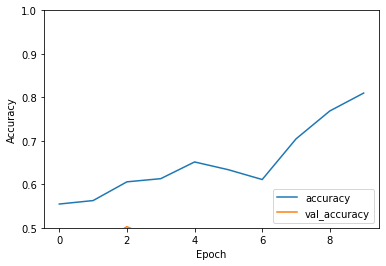

In [ ]:
from keras.callbacks import ModelCheckpoint
# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "/content/drive/MyDrive/models/VGG1616-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]

# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256
# train the network
history = model.fit(train_images, train_labels, shuffle= True,
	validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
	epochs=EPOCHS, callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#75, 50, 3

In [ ]:
print(len(train_labels))

**image prediction**

In [ ]:
import pdb
y_hat = model.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
print(len(y_hat))
count_truth=0;
count_false=0
for i, index in enumerate(range(len(y_hat)), start=0):
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    #ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    print("The prediction:"+class_names[predict_index]+"\t \t The truth:"+class_names[true_index])
    if (predict_index==true_index):
      count_truth=count_truth+1
    else:
      count_false=count_false+1

print("Number of right prediction :"+str(count_truth))
print("Number of wrong prediction :"+str(count_false))

378
The prediction:Black	 	 The truth:Black
The prediction:Black	 	 The truth:Grey
The prediction:Black	 	 The truth:Black
The prediction:Black	 	 The truth:Black
The prediction:Brown	 	 The truth:Black
The prediction:Black	 	 The truth:Black
The prediction:Brown	 	 The truth:Black
The prediction:Blond	 	 The truth:Blond
The prediction:Grey	 	 The truth:White
The prediction:Grey	 	 The truth:White
The prediction:Blond	 	 The truth:Blond
The prediction:Blond	 	 The truth:Blond
The prediction:Brown	 	 The truth:Black
The prediction:Grey	 	 The truth:Grey
The prediction:Brown	 	 The truth:Brown
The prediction:Brown	 	 The truth:Not Visible
The prediction:Blond	 	 The truth:Brown
The prediction:Black	 	 The truth:Brown
The prediction:Brown	 	 The truth:Blond
The prediction:Black	 	 The truth:Black
The prediction:Grey	 	 The truth:Blond
The prediction:Grey	 	 The truth:Brown
The prediction:Brown	 	 The truth:Brown
The prediction:Black	 	 The truth:Grey
The prediction:Black	 	 The truth:Blac

<Figure size 1440x1440 with 0 Axes>

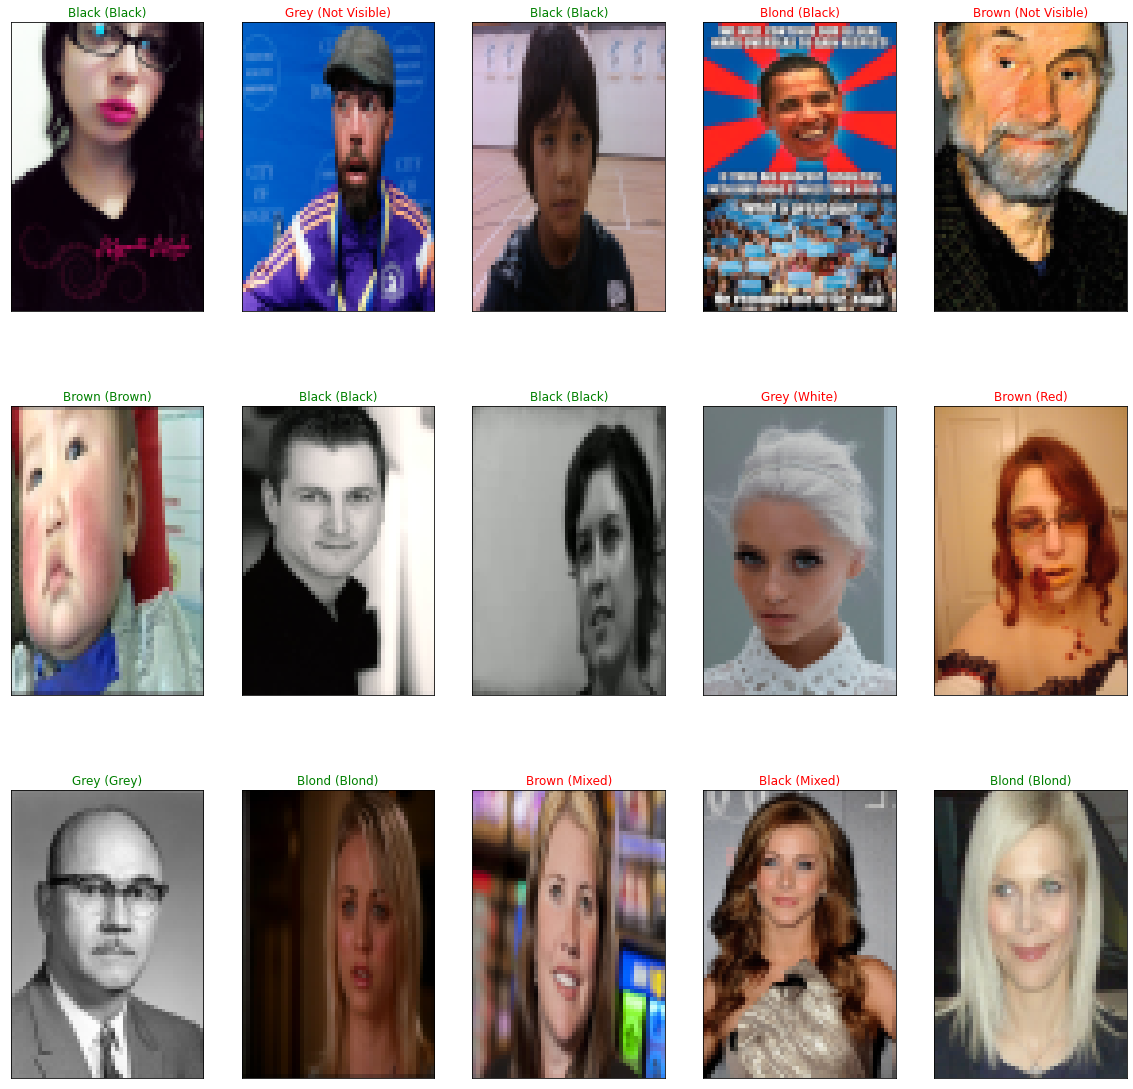

In [ ]:
import pdb
y_hat = model.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
   # true_index=1
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Testing the prediction

In [ ]:
import pdb
y_hat = model.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
print(len(y_hat))
count_truth=0;
count_false=0
for i, index in enumerate(range(len(y_hat)), start=0):
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    #ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    print("The prediction:"+class_names[predict_index]+"\t \t The truth:"+class_names[true_index])
    if (predict_index==true_index):
      count_truth=count_truth+1
    else:
      count_false=count_false+1

print("Number of right prediction :"+str(count_truth))
print("Number of wrong prediction :"+str(count_false))

378
The prediction:Black	 	 The truth:Black
The prediction:Black	 	 The truth:Grey
The prediction:Black	 	 The truth:Black
The prediction:Black	 	 The truth:Black
The prediction:Brown	 	 The truth:Black
The prediction:Black	 	 The truth:Black
The prediction:Brown	 	 The truth:Black
The prediction:Blond	 	 The truth:Blond
The prediction:Grey	 	 The truth:White
The prediction:Grey	 	 The truth:White
The prediction:Blond	 	 The truth:Blond
The prediction:Blond	 	 The truth:Blond
The prediction:Brown	 	 The truth:Black
The prediction:Grey	 	 The truth:Grey
The prediction:Brown	 	 The truth:Brown
The prediction:Brown	 	 The truth:Not Visible
The prediction:Blond	 	 The truth:Brown
The prediction:Black	 	 The truth:Brown
The prediction:Brown	 	 The truth:Blond
The prediction:Black	 	 The truth:Black
The prediction:Grey	 	 The truth:Blond
The prediction:Grey	 	 The truth:Brown
The prediction:Brown	 	 The truth:Brown
The prediction:Black	 	 The truth:Grey
The prediction:Black	 	 The truth:Blac

<Figure size 1440x1440 with 0 Axes>

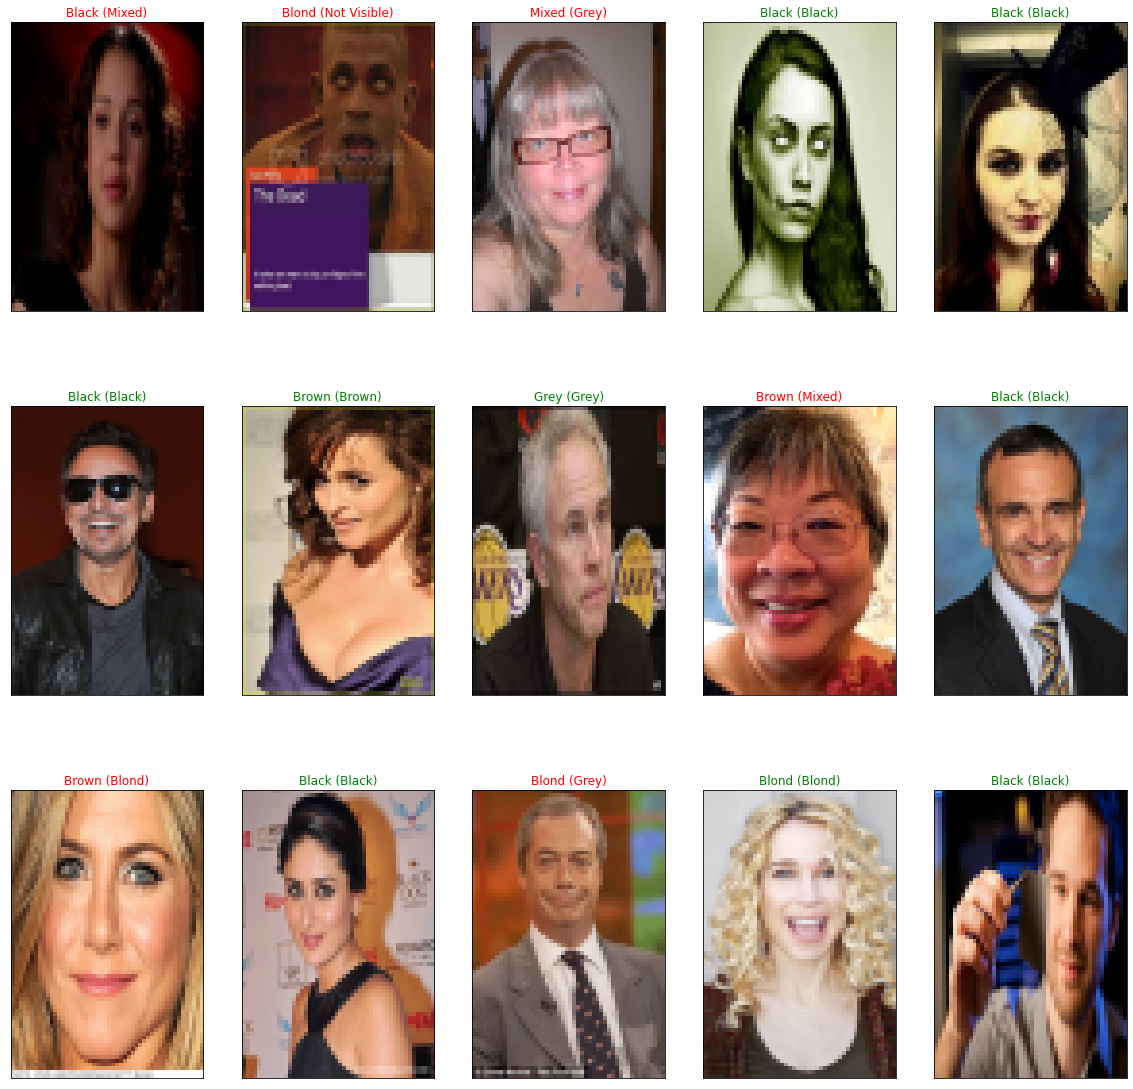

In [ ]:
import pdb
y_hat = model.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
   # true_index=1
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

**Confusion Matrix**

In [ ]:
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
#cm=confusion_matrix(test_labels,y_hat)

cm=multilabel_confusion_matrix(true_classes,predicted_classes)

print(cm)

[[[ 9  1]
  [ 0  5]]

 [[11  2]
  [ 1  1]]

 [[11  3]
  [ 0  1]]

 [[12  0]
  [ 2  1]]

 [[12  1]
  [ 2  0]]

 [[13  0]
  [ 2  0]]]


**Using the built-in Keras code and weights of ResNet**

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

# load model without classifier layers
model2 = ResNet50(include_top=False, weights="imagenet", input_shape=(75, 50, 3)) 
    

# add new classifier layers
flat1 = layers.Flatten()(model2.layers[-1].output)
output = layers.Dense(10, activation='softmax')(flat1)


# define new model
model2 = Model(inputs=model2.inputs, outputs=output)

model2.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




In [ ]:
model2.summary()

**Train Resnet**

In [ ]:
# Training
history = model2.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

**Predictions**

In [ ]:
import pdb
y_hat = model2.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
print(len(y_hat))
count_truth=0;
count_false=0
for i, index in enumerate(range(len(y_hat)), start=0):
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    #ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    print("The prediction:"+class_names[predict_index]+"\t \t The truth:"+class_names[true_index])
    if (predict_index==true_index):
      count_truth=count_truth+1
    else:
      count_false=count_false+1

print("Number of right prediction :"+str(count_truth))
print("Number of wrong prediction :"+str(count_false))

In [ ]:
import pdb
y_hat = model2.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    predicted_classes.append(class_names[predict_index])
    x=int(test_labels[index])
    true_index =x 
    true_classes.append(class_names[true_index])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    
   # true_index=1
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
glasses_data['glasses'].hist()

**Features Map**

In [ ]:
from numpy import expand_dims
from keras.models import Model

# redefine model to output right after the first conv layer
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)   ### here you need to select only conv or pooling layers; the index should always start from 1; index 0 corresponds to the input layer
model1.summary()
# load the image with the required shape
img = test_images[0]   ### if you want change the index here to load another image from the test/training set
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first conv layer
feature_maps = model1.predict(img)
# plot all 64 maps in 8x8 squares   
### square1 times square2 should always be the number of output feature maps of the layer 
### (in other words should be the last number of the 'output shape' column of the model summary)
square1 = 8
square2 = 8
ix = 1

# Display the input image
plt.imshow(img[0])


figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()